# Emissions
In this notebook we use the [cams-global-emission-inventories](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-global-emission-inventories?tab=overview) dataset. The dataset contains anthropogenic and natural emissions. We'll focus on nitrogen oxides (NOx). These come from several sources: agriculture, ships, power generation, road traffic, industry.

In [79]:
import numpy as np
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcol
from matplotlib.colors import ListedColormap

from zipfile import ZipFile

## The CAMS CDS API
We build the query to submit to the CAMS web service.

In [50]:
DATADIR = 'data'
WDIR = f'cams-global-emissions-inventory'

In [51]:
variable = 'nitrogen_oxides'
source = 'anthropogenic'
start_year = '2000'
years = (np.array('2000', dtype=int) + np.arange(1)).tolist()
years

[2000]

In [45]:
import cdsapi
c = cdsapi.Client()

In [52]:
c.retrieve(
    'cams-global-emission-inventories',
    {
        'variable': variable,
        'source': [
            source,
        ],
        'version': 'latest',
        'year': years,
        'format': 'zip',
    },
    f'{DATADIR}/{WDIR}.zip')

2024-07-16 17:55:57,851 INFO Welcome to the CDS
2024-07-16 17:55:57,853 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-global-emission-inventories
2024-07-16 17:55:57,946 INFO Downloading https://download-0000-ads-clone.copernicus-climate.eu/cache-compute-0000/cache/data8/dataset-cams-global-emission-inventories-58ebb12f-9d17-49ac-8881-84a25a95e198.zip to data/cams-global-emissions-inventory.zip (367.9M)
2024-07-16 17:56:37,153 INFO Download rate 9.4M/s  


Result(content_length=385725879,content_type=application/zip,location=https://download-0000-ads-clone.copernicus-climate.eu/cache-compute-0000/cache/data8/dataset-cams-global-emission-inventories-58ebb12f-9d17-49ac-8881-84a25a95e198.zip)

In [49]:
with ZipFile(f'{DATADIR}/{WDIR}.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall(path=f'{DATADIR}/{WDIR}/')

## Emissions of nox for agl sectors

In [167]:
with xr.open_dataset(f'{DATADIR}/{WDIR}/CAMS-GLOB-ANT_v4.2_nitrogen-oxides_2000.nc', decode_times=False) as nox_ds:
        nox_agl = nox_ds['agl']

In [168]:
nox_ds

<xarray.Dataset>
Dimensions:  (time: 12, lat: 1800, lon: 3600)
Coordinates:
  * time     (time) int32 0 1 2 3 4 5 6 7 8 9 10 11
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 -179.9 -179.9 -179.8 -179.6 ... 179.8 179.9 179.9
Data variables: (12/13)
    agl      (time, lat, lon) float32 ...
    ags      (time, lat, lon) float32 ...
    awb      (time, lat, lon) float32 ...
    ene      (time, lat, lon) float32 ...
    fef      (time, lat, lon) float32 ...
    ind      (time, lat, lon) float32 ...
    ...       ...
    shp      (time, lat, lon) float32 ...
    slv      (time, lat, lon) float32 ...
    sum      (time, lat, lon) float32 ...
    swd      (time, lat, lon) float32 ...
    tnr      (time, lat, lon) float32 ...
    tro      (time, lat, lon) float32 ...
Attributes:
    Conventions:      CF-1.6
    projection:       latlon
    authors:          N.Elguindi and C.Granier
    description:      Monthly emissions from CAMS-GLOB-ANT_v4.2 nox emissions...
    product_version:  v4.2
    title:            CAMS Global anthropogenic emissions
    institution:      Laboratoire d'Aérologie/CNRS 
    source:           EDGARv4.3.2 emissions up to 2010 and CEDS emissions up ...
    references:       Granier, C., S. Darras, H. Denier van der Gon, J. Douba...
    history:          Mon Mar  1 16:08:43 2021: ncap2 -s time=array(0,1,$time...
    publisher_url:    https://eccad.aeris-data.fr
    NCO:              netCDF Operators version 4.9.2 (Homepage = http://nco.s...

In [169]:
nox_agl

<xarray.DataArray 'agl' (time: 12, lat: 1800, lon: 3600)>
[77760000 values with dtype=float32]
Coordinates:
  * time     (time) int32 0 1 2 3 4 5 6 7 8 9 10 11
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 -179.9 -179.9 -179.8 -179.6 ... 179.8 179.9 179.9
Attributes:
    long_name:               Emissions of nox for agl sectors
    units:                   kg m-2 s-1
    sector_name:             Agriculture livestock (mma)
    molecular_weight_units:  g mole-1
    standard_name:           tendency_of_atmosphere_mass_content_of_nox_expre...
    molecular_weight:        30.0

In [170]:
nox_agl_0 = nox_agl[0] 
nox_agl_0

<xarray.DataArray 'agl' (lat: 1800, lon: 3600)>
[6480000 values with dtype=float32]
Coordinates:
    time     int32 0
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 -179.9 -179.9 -179.8 -179.6 ... 179.8 179.9 179.9
Attributes:
    long_name:               Emissions of nox for agl sectors
    units:                   kg m-2 s-1
    sector_name:             Agriculture livestock (mma)
    molecular_weight_units:  g mole-1
    standard_name:           tendency_of_atmosphere_mass_content_of_nox_expre...
    molecular_weight:        30.0

In [171]:
nox_agl_0_place_0 = nox_agl_0.sel(lat = 60.15, lon = 6.65).values.item()
nox_agl_0_place_0

1.3508991356645829e-14

In [172]:
maplon = [-180,180]
maplat = [-90,90]
lonmin = maplon[0]
lonmax = maplon[1]
latmin = maplat[0]
latmax = maplat[1]

Text(0.5, 1.0, 'Emissions of nox for agl sectors - 2000-01-01')

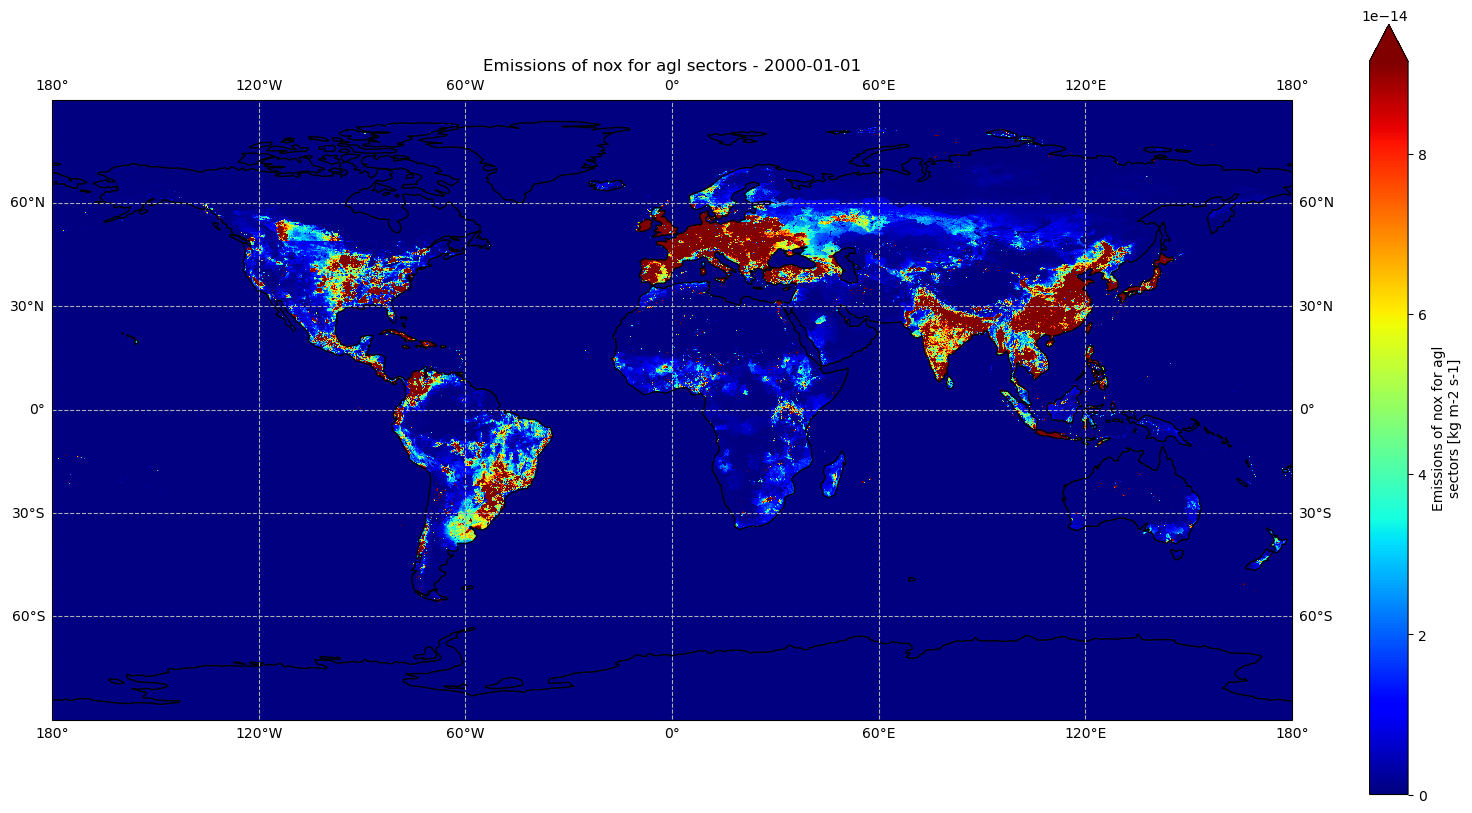

In [173]:
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.gridlines(draw_labels=True, linestyle='--')
#ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
#ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
#ax.add_feature(cartopy.feature.RIVERS)
ax.coastlines()
ax.set_extent([lonmin,lonmax,latmin,latmax], crs=ccrs.PlateCarree()) 
nox_agl_0.plot(ax=ax, add_colorbar=True, cmap='jet', robust=True) # robust=True removes the outliers
plt.title('Emissions of nox for agl sectors - 2000-01-01')